In [1]:
%matplotlib notebook

import matplotlib.pylab as plt
import numpy as np
import notebook_style
labels = notebook_style.labels

#### Constants
kelvin = 273.15
R = 8.314472

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cure-Modeling-for-the-epoxy-RTM6" data-toc-modified-id="Cure-Modeling-for-the-epoxy-RTM6-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cure Modeling for the epoxy RTM6</a></span><ul class="toc-item"><li><span><a href="#Modeling-of-Glass-Transition-Temperature-and-Degree-of-Cure-using-DiBenedetto's-equation" data-toc-modified-id="Modeling-of-Glass-Transition-Temperature-and-Degree-of-Cure-using-DiBenedetto's-equation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modeling of Glass Transition Temperature and Degree of Cure using DiBenedetto's equation</a></span></li><li><span><a href="#Cure-Modeling-with-Arrhenius-reaction-model" data-toc-modified-id="Cure-Modeling-with-Arrhenius-reaction-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cure Modeling with Arrhenius reaction model</a></span><ul class="toc-item"><li><span><a href="#Reaction-Model:" data-toc-modified-id="Reaction-Model:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Reaction Model:</a></span></li><li><span><a href="#Arrhenius-Parameters-are-calculated-by:" data-toc-modified-id="Arrhenius-Parameters-are-calculated-by:-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Arrhenius Parameters are calculated by:</a></span></li><li><span><a href="#Maximum-attainable-Degree-of-Cure:" data-toc-modified-id="Maximum-attainable-Degree-of-Cure:-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Maximum attainable Degree of Cure:</a></span></li></ul></li><li><span><a href="#Cure-modelling-in-Python" data-toc-modified-id="Cure-modelling-in-Python-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cure modelling in Python</a></span><ul class="toc-item"><li><span><a href="#Isothermal-Cure" data-toc-modified-id="Isothermal-Cure-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Isothermal Cure</a></span></li><li><span><a href="#Modelling-Temperature-Cycle" data-toc-modified-id="Modelling-Temperature-Cycle-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Modelling Temperature Cycle</a></span></li></ul></li></ul></li></ul></div>

# Cure Modeling for the epoxy RTM6

_notebook by Nico Liebers (nico.liebers@dlr.de), Deutsches Zentrum für Luft- und Raumfahrt (DLR), 2020_

    Code under MIT license, all other material under CC-BY-3.0 license

Following the models and parameters from Robert Hein et al, DLR:

> Exner, Wibke; Hein, Robert; Mahrholz, Thorsten; Wierach, Peter; Monner, Hans Peter; Sinapius, Michael (2018): _Impact of nanoparticles on the process-induced distortions of carbon fiber reinforced plastics. An experimental and simulative approach._ In: J. Appl. Polym. Sci. 43 (14), S. 47031. DOI: https://doi.org/10.1002/app.47031

## Modeling of Glass Transition Temperature and Degree of Cure using DiBenedetto's equation
DiBenedetto's equation:

\begin{equation}
T_g(X) = T_{g0} + \frac{(T_{g\infty} - T_{g0}) \cdot \lambda  \cdot  X}{1-(1-\lambda) \cdot X}
\end{equation}
With:
- $\lambda$ - Adjustable parameter
- $X$ - Degree of cure
- $T_g$ - Current glass transition temperature
- $T_{g0}$ - Resin's minumum glass transition temperature
- $T_{g\infty}$ - Resin's maximum glass transition temperature


Comparing model parameters of Hein with:
> Karkanas, P. I. and Partridge, I. K. (2000), _Cure modeling and monitoring of epoxy/amine resin systems. II. Network formation and chemoviscosity modeling._ J. Appl. Polym. Sci., 77: 2178-2188. 
https://doi.org/10.1002/1097-4628(20000906)77:10%3C2178::AID-APP11%3E3.0.CO;2-0

<IPython.core.display.Javascript object>


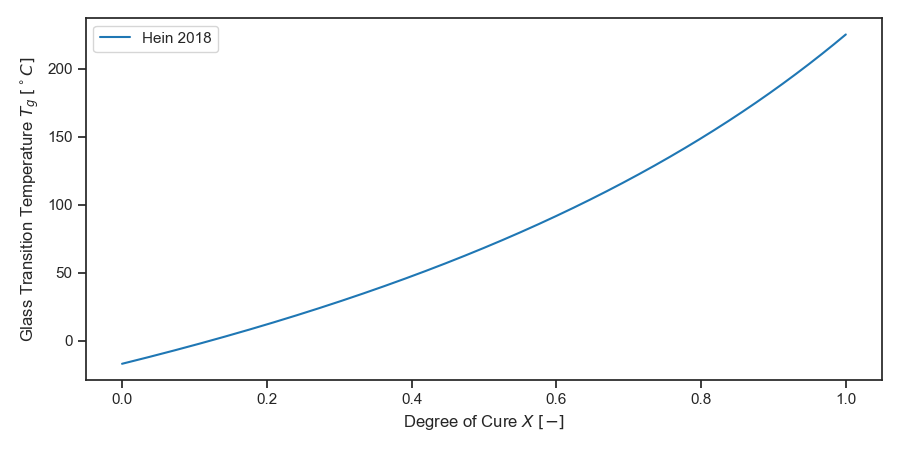

In [2]:
def calc_Tg(X, model_parameters):
    """Calculate current glass transition temperature"""
    Tg0 = model_parameters["Tg0"]
    Tg8 = model_parameters["Tg8"]
    lam = model_parameters["lam"]
    return Tg0 + ( (Tg8 - Tg0) * lam * X) / (1 - (1 - lam) * X)

# Values for RTM6
Hein_2018 = dict(Tg0 = -16.8, Tg8 = 225, lam = .543)

X = np.linspace(0, 1, 1000)
Tg = calc_Tg(X, Hein_2018)

plt.figure()
plt.plot(X, Tg, label="Hein 2018")
plt.legend()
plt.xlabel(labels["doc"])
plt.ylabel(labels["Tg"]);
plt.tight_layout();

## Cure Modeling with Arrhenius reaction model

### Reaction Model:

$$
\frac{\mathrm{d} X}{\mathrm{d} t} = k_1 (1 - X)^l + k_2 X^m (1 - X)^n
$$

With:

- $\frac{\mathrm{d}X}{\mathrm{d} t}$ - Reaction Rate
- $k_{1, 2}$ - Arrhenius parameters $[s^{-1}]$
- $l, m, n$ - Reaction order $[-]$

### Arrhenius Parameters are calculated by:

$k_i = A_i \exp \left(-\frac{E_{Ai}}{R \cdot T} \right)$

With:

- $T$ - Temperature in $[K]$
- $R$ - Universal Gas Constant $(R \approx 8.314462 \; J \cdot K^{-1} \cdot mol^{-1})$
- $A_i$ - Frequency factor $[s^{-1}]$
- $E_{Ai}$ - Activation Energy $[J \cdot mol^{-1}]$

### Maximum attainable Degree of Cure:

Extending the above model by maximum attainable degree of cure $X_{max}$:

$$
\frac{\mathrm{d} X}{\mathrm{d} t} = k_1 (X_{\max} - X)^l + k_2 X^m (X_{\max} - X)^n
$$

$$
X_{\max} = ( 1 + \exp(-\vartheta*a+b) )^{-1}
$$

With $a$ and $b$ as fitting parameters and $\vartheta$ as temperature in $[^\circ C]$. 

In [3]:
def calc_X_max(temperature, model_parameters): 
    """Calculate maximum attainable degree of cure depending on cure temperature"""
    a = model_parameters["a"]
    b = model_parameters["b"]
    return 1/(1+np.exp(-temperature*a+b))

#### Update model parameters
Hein_2018.update(dict(a=.04, b=3.93))

#### Calculate X_max for temperature span
temp = np.linspace(-20, 250, 1000)
X_max = calc_X_max(temp, Hein_2018)

#### Plot
plt.figure()
plt.plot(temp, X_max, label=r"$X_{\max}$ (Hein 2018)")
plt.legend()
plt.xlabel(labels["temp"])
plt.ylabel(labels["X_max"])
plt.tight_layout();

<IPython.core.display.Javascript object>

## Cure modelling in Python

In [4]:
def arrhenius(A, E, T):
    """Calculate Arrhenius factor k"""
    return A*np.exp(-E / R / T)
def arrhenius_facors(temp, model_parameters):
    """Calculate both arrhenius factos k1 and k2 for temperature temp and the model"""
    T = temp + kelvin
    A1 = model_parameters["A1"]
    EA1 = model_parameters["EA1"]
    A2 = model_parameters["A2"]
    EA2 = model_parameters["EA2"]
    return arrhenius(A1, EA1, T), arrhenius(A2, EA2, T)
def interpol_tempcycle(t, cycle):
    """Return temperature at time t in cycle by linear interpolation"""
    return np.interp(t, cycle[:,0], cycle[:,1])
def reaction_model(X, t, cycle, model_parameters):
    """Calculate reaction rate, input function for numerical integration"""
    temp = interpol_tempcycle(t, cycle)
    k1, k2 = arrhenius_facors(temp, model_parameters)
    max_X = calc_X_max(temp, model_parameters)
    m = model_parameters["m"]
    l = model_parameters["l"]
    n = model_parameters["n"]
    d_X = np.max([0, max_X - X])
    return k1 * d_X**l + k2 * X**m * d_X**n

#### Update Model parameters
Hein_2018.update(dict(A1=np.exp(11.149), EA1=75549, A2=np.exp(8.762), EA2=50911, l=.489, m=1.549, n=2.179))
# Degree of cure at which gelation happens
Hein_2018.update(dict(Xgel=.58))

### Isothermal Cure

In [5]:
def RK4_method(t0, X0, dt, params):
    """Runge-Kutta-4-Method"""
    k1 = reaction_model(X0, t0, *params)
    t_ = t0 + dt/2
    k2 = reaction_model(X0 + k1 * dt/2, t_, *params)
    k3 = reaction_model(X0 + k2 * dt/2, t_, *params)
    k4 = reaction_model(X0 + k3 * dt, t0 + dt, *params)
    X1 = X0 + (k1 + 2*k2 + 2*k3 + k4) * dt / 6
    return X1

def iterate(t0, X0, Nt, t_max, method, params):
    """Numerical Integration Wrapper"""
    dt = (t_max - t0) / (Nt - 1)
    t = np.arange(Nt) * dt + t0
    X = np.zeros(Nt)
    X[0] = X0
    for n in range(1, Nt):
        X[n] = method(t[n-1], X[n-1], dt, params)
    return t, X


from scipy.integrate import odeint

#### Modeling Parameters
# Cure temperature [°C]
T = 160
# Degree of Cure at beginning
X0 = 0
# end time of simulation [s]
t_max = 2 * 60 * 60
# Number of time steps
N = 1001
# evenly spaced time vector for output
t = np.linspace(0, t_max, N)
# Make an array for temperature of same length
T_array = [T] * N

#### Solve Partial Equation of Cure Reaction at time steps t
# use scipy's method
X = odeint(reaction_model, X0, t, args=(np.array([t, T_array]), Hein_2018))
X = np.ravel(X)

# use own method
# t, X = iterate(0, X0, N, t_max, RK4_method, (np.array([t, T_array]), Hein_2018))
# plt.plot(t/60, X, label=r"$X(t)$")

plt.figure()
# plot degree of cure
plt.plot(t/60, X, label=r"$X(t)$")

# Plot Degree of Cure at which gellation occurs
Xgel = Hein_2018["Xgel"]
plt.axhline(Xgel, label=f"$X_{{gel}} = {Xgel: .2f}$", color="k", ls="--", alpha=.6)

# Find and plot gellation time
idx_gel = np.argmin(np.abs(X-Xgel))
tgel = t[idx_gel]/60
plt.axvline(tgel, label=f"$t_{{gel}} = {tgel: .2f} min$", color="k", ls=":", alpha=.6)

plt.xlabel(labels["time"])
plt.ylabel(labels["doc"])
plt.legend()
plt.tight_layout();

<IPython.core.display.Javascript object>

In [6]:
#### Modeling Parameters
# Degree of Cure at beginning
X0 = 0
# end time of simulation [s]
t_max = 8*3600
# Number of time steps
N = 1001
# evenly spaced time vector for output
t = np.linspace(0, t_max, N)
dt = t[1] - t[0]


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# Cure temperatures [°C]
for T in range(120, 201, 20):
    # Make an array for temperature of same length
    T_array = np.ones(N) * T

    #### Solve Partial Equation of Cure Reaction at time steps t
    X = odeint(reaction_model, X0, t, args=(np.array([t, T_array]), Hein_2018))
    X = np.ravel(X)
    label = f"$\\vartheta = {T} ^\\circ C$"
    ax1.plot(t/60, X, label=label)
    
    dXdt = np.gradient(X) / dt * 60
    ax2.plot(t/60, dXdt, label=label)

plt.legend()
ax2.set_xlabel(labels["time"])
ax1.set_ylabel(labels["doc"])
ax2.set_ylabel(r"$\frac{\mathrm{d} X}{\mathrm{d} t} \left[ min^{-1} \right]$")
plt.tight_layout();

<IPython.core.display.Javascript object>

### Modelling Temperature Cycle

In [7]:
from helpers import add_process_step

#### Temperature Cycle
# temperature ramp [K/min]
ramp = 2

# start and end temperature [°C]
temp0 = 60
cycle = np.array([[0, temp0]])

# first dwell temperature and dwell duration [min]
temp1 = 160
duration1 = 75
cycle = add_process_step(cycle, temp1, duration1, ramp=ramp)

# second dwell temperature and duration
temp2 = 180
duration2 = 120
cycle = add_process_step(cycle, temp2, duration2, ramp=ramp)

# cool phase
cycle = add_process_step(cycle, temp0, duration=0, ramp=ramp)

# convert minutes to seconds
cycle[:, 0] *= 60

plt.figure()
plt.plot(cycle[:, 0]/60, cycle[:, 1], marker="o")
plt.xlabel(labels["time"])
plt.ylabel(labels["temp"])

## Formatting
plt.autoscale(axis="x", tight=True)
plt.tight_layout()

<IPython.core.display.Javascript object>

In [8]:
#### Modeling Parameters
# Degree of Cure at beginning
X0 = 0
# end time of simulation (end time of temperature cycle)
t_max = cycle[-1, 0]
# Number of time steps
N = 1001
# evenly spaced time vector for output
t = np.linspace(0, t_max, N)

#### Solve Partial Equation of Cure Reaction at time steps t
X = odeint(reaction_model, X0, t, args=(cycle, Hein_2018))
X = np.ravel(X)

#### Plot results
fig, ax = plt.subplots(3, 1, sharex=True, figsize=[9, 9])
markerline_style = dict(color="k", alpha=.6, ls="-.")

## Temperature cycle and glass transition temperature
plt.sca(ax[0])
plt.plot(cycle[:, 0]/60, cycle[:, 1], label=r"$\vartheta_{Cure}$")
Tg = calc_Tg(X, Hein_2018)
plt.plot(t/60, Tg, label=r"$T_g (X)$")

## Find glass transition points
temp = interpol_tempcycle(t, cycle)
idx = np.where( (Tg[:-1] < temp[:-1]) & (Tg[1:] >= temp[1:]))[0]
for AX in ax:
    for i, _idx in enumerate(idx):
        if (i==0) & (AX==ax[0]):
            label = "Vitrification"
        else:
            label = None
        AX.axvline(t[_idx]/60, label=label, **markerline_style)

plt.ylabel(labels["temp"])

## Degree of Cure and maximum attainable degree of cure at current cure temperature
plt.sca(ax[1])
markerline_style.update(dict(ls="--"))
plt.axhline(1, label=r"$X=1$", **markerline_style)
plt.plot(t/60, X, label=r"$X$")
X_max = calc_X_max(interpol_tempcycle(t, cycle), Hein_2018)
plt.plot(t/60, X_max, label=r"$X_{\max}(\vartheta_{Cure})$")
plt.ylabel(labels["doc"])

## Reaction rate
plt.sca(ax[2])
diff_X = np.gradient(X, axis=0)/(t[1] - t[0])*60
plt.plot(t/60, diff_X*100)
plt.ylim((0, None))
plt.ylabel(r"Reaction rate $\frac{\mathrm{d} X}{\mathrm{d} t} \; \left[ \frac{\%}{min} \right]$")
plt.xlabel(labels["time"])

## Formatting
plt.autoscale(axis="x", tight=True)
plt.tight_layout()
plt.subplots_adjust(right=.8)
[AX.legend(loc="upper left", bbox_to_anchor=[1, 1]) for AX in ax[:-1]];

<IPython.core.display.Javascript object>